# Linear Regression Exercise

## Use linear regression on the *bodyfat* dataset

We are going to follow the same pipeline than in the lab session but now with a simple dataset.  

- [ ] Visualize your dataset. Does it have anything strange?
- [ ] Split your dataset in train and test. 
- [ ] Design a pre-processing for your dataset and apply it to your partitions. 
- [ ] Train a Linear Regression model.
- [ ] Train a Ridge Regression model with cross-validation.  
- [ ] Train a Lasso Regression model with cross-validation.  
- [ ] Compare your three models using cross-validation metrics and looking into their weights. Do they show strong differences?
- [ ] Compute the generalization performance of the best model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,  KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

from statsmodels.genmod.generalized_linear_model import GLM
import statsmodels.api as sm
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

sns.set()
pd.set_option('precision', 3)

In [2]:
bodyfat_data = pd.read_csv("bodyfatdata.txt", 
                        delim_whitespace=True, 
                        names=['triceps', 'thigh', 'midarm', 'bodyfat'])

N=bodyfat_data.shape[0]
bodyfat_data.describe()

,triceps,thigh,midarm,bodyfat
count,20.000,20.000,20.000,20.000
mean,25.305,51.170,27.620,20.195
std,5.023,5.235,3.647,5.106
min,14.600,42.200,21.300,11.700
25%,21.500,47.775,24.750,17.050
50%,25.550,52.000,27.900,21.200
75%,29.900,54.625,30.025,24.275
max,31.400,58.600,37.000,27.200


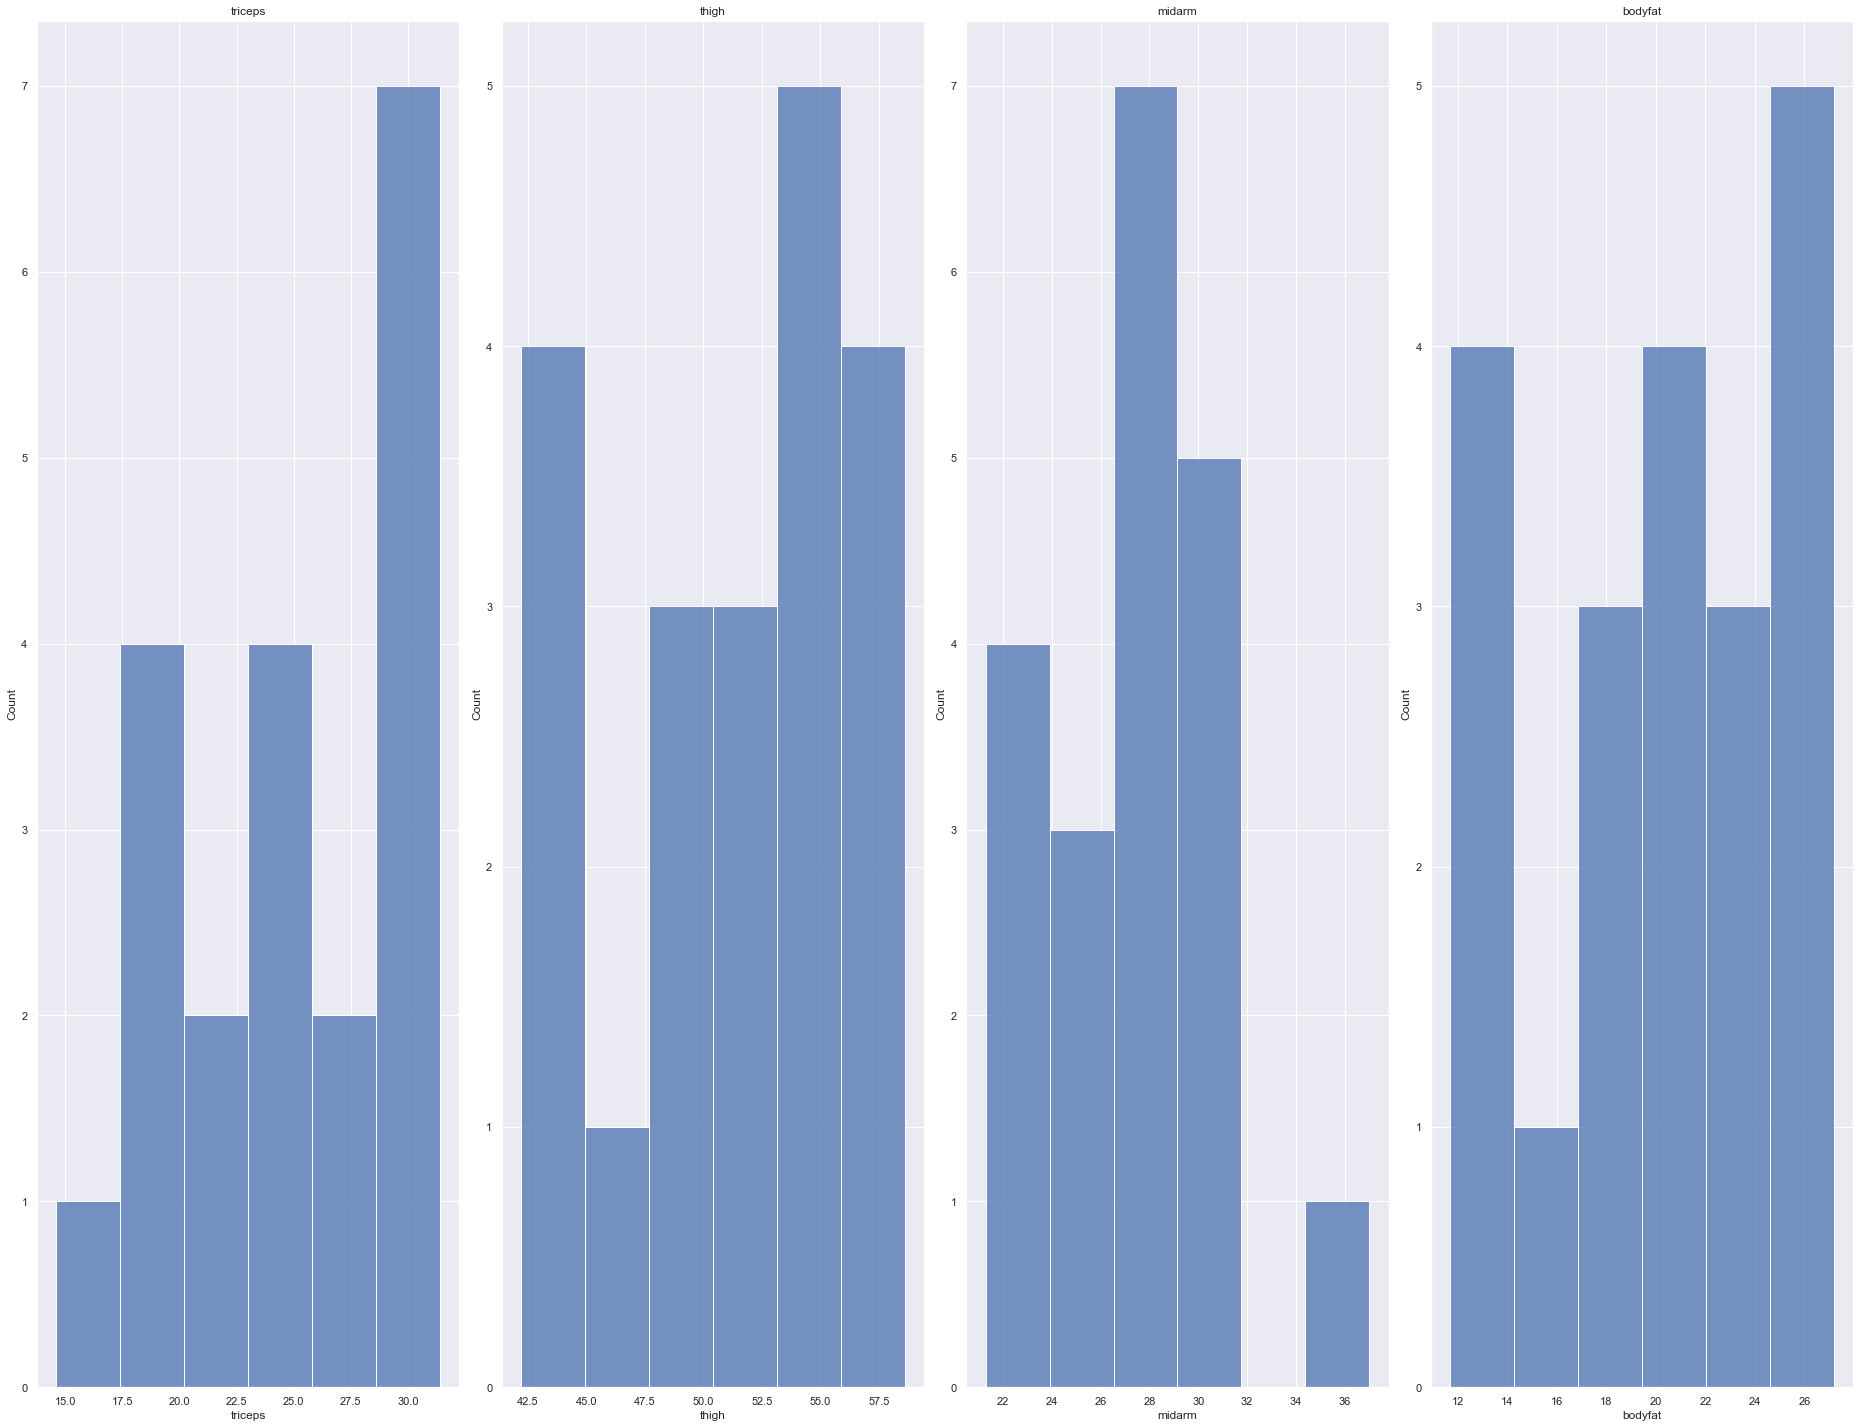

In [3]:
fig, axes = plt.subplots(1,4,figsize=(26,20))

for i, c in enumerate(bodyfat_data.columns[:]):
    ax = axes.reshape(-1)[i]
    if bodyfat_data[c].dtype.kind == 'O':
        a = sns.countplot(x=c,data=bodyfat_data,ax=ax)
    else:
        b = sns.histplot(x=c,data=bodyfat_data,ax=ax)
    t = ax.set_title(c)
plt.tight_layout()

In [4]:
bodyfat_data.isna().sum().sort_values(ascending=False)

triceps    0
thigh      0
midarm     0
bodyfat    0
dtype: int64

In [5]:
predLabel = 'bodyfat'
X = bodyfat_data.loc[:,bodyfat_data.columns != predLabel]
y = bodyfat_data[predLabel]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
# We instantiate a linear regression. 
lr = LinearRegression(normalize=False)

# Now we train it on train data with fit method
lr.fit(X_train,y_train)

# We can predict using the predict method
y_pred = lr.predict(X_train)

weights = lr.coef_
intercept = lr.intercept_
# You can access to some info about the model, like the weights.
print('Coefficients: \n', weights[:10])
print('Intercept: \n', intercept)

Coefficients: 
 [ 4.20202984 -2.80927831 -2.07959216]
Intercept: 
 114.84500239258263


In [7]:
model = sm.OLS(y_train, sm.add_constant(X_train))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                bodyfat   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     10.20
Date:                Wed, 10 Mar 2021   Prob (F-statistic):            0.00297
Time:                        18:32:16   Log-Likelihood:                -29.508
No. Observations:                  13   AIC:                             67.02
Df Residuals:                       9   BIC:                             69.28
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        114.8450    162.585      0.706      0.498    -252.947     482.637
triceps        4.2020      4.871      0.863      0.411      -6.817      15.221
thigh         -2.8093      4.181     -0.672      0.519     -12.268       6.649
midarm        -2.0796      2.594     -0.802      0.443      -7.947       3.787
==============================================================================
Omnibus:                        0.965   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.617   Jarque-Bera (JB):                0.680
Skew:                          -0.088   Prob(JB):                        0.712
Kurtosis:                       1.893   Cond. No.                     1.32e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

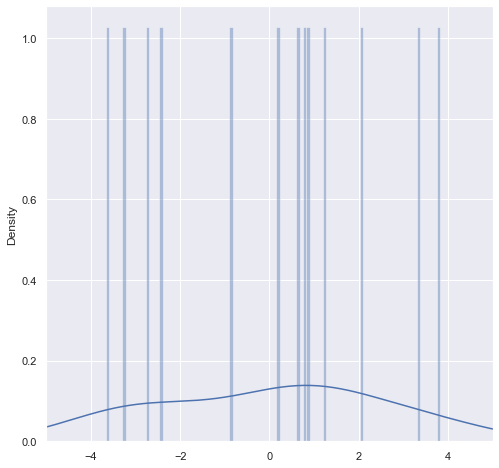

In [8]:
# residuals ~ N(0, \sigma^2)
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim([-5,5])
sns.distplot(result.resid,bins=100);

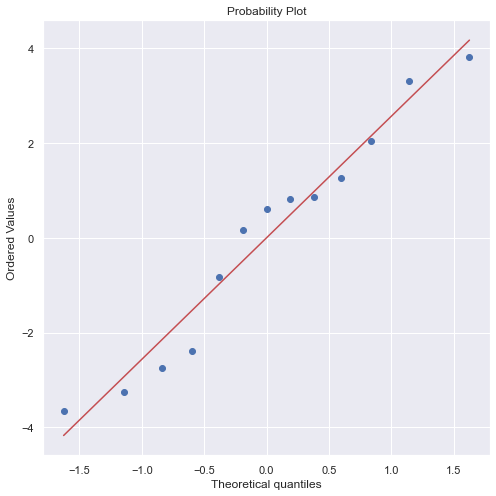

In [9]:
fig, ax = plt.subplots(figsize=(8,8))
stats.probplot(result.resid, plot=plt);

In [10]:
N = X_train.shape[0]

# using statsmodel
prediction = result.predict(sm.add_constant(X_train))
mean_square_error = np.sum((y_train - prediction)**2)/N

# You can also use sklearn implementation
mean_square_error_sk = mean_squared_error(y_train, prediction)

mean_square_error, mean_square_error_sk

(5.4840270062512735, 5.4840270062512735)

In [11]:
norm_mse = np.sum((y_train - prediction)**2)/((N)*np.var(y_train))

# You can also use sklearn r2 implementation to calculate this value
norm_mse_sk = 1-r2_score(y_train,prediction)

norm_mse, norm_mse_sk

(0.2272271740921131, 0.22722717409211313)

In [12]:
R_squared = (1 - norm_mse)

# You can also use sklearn implementation
R_squared_sk = r2_score(y_train,prediction) 

R_squared, R_squared_sk

(0.7727728259078869, 0.7727728259078869)

Data shape

In [13]:
X_train.shape

(13, 3)

### Cross validation

In [14]:
lr = LinearRegression(normalize=False)
lr.fit(X_train,y_train)
folds_r2 = cross_val_score(lr, X_train,y_train, cv=3, scoring='r2')
lr_r2 = np.mean(folds_r2) 
folds_r2, lr_r2

(array([-1.76434404,  0.53241334,  0.55688574]), -0.2250149843311089)

### Ridge Regression

$\min_w (|| y - Xw ||^2 + \lambda * ||w||^2_2)$

In [15]:
ridge_cross_val_metrics = pd.DataFrame(columns=['mean MSE', 'mean norm_MSE', 'mean R2'])
lambdas = [1e-10,1e-5,1e-4,1e-3,1e-2,0.1, 0.5,1,5,10,50,100]
# We calculate the cross-validation metrics for each lambda 
for lambda_val in lambdas:
    kf = KFold(n_splits=3)
    i=1
    cv_mse = []
    cv_nmse = []
    cv_r2 = []
    # We compute the metrics for each fold and then perform the mean.
    for train_index, test_index in kf.split(X_train):
        x_train_fold = X_train.values[train_index,:]
        y_train_fold = y_train.values[train_index]
        x_test_fold = X_train.values[test_index,:]
        y_test_fold = y_train.values[test_index]

        lr          = Ridge(normalize=False,alpha=lambda_val)
        lr.fit(x_train_fold,y_train_fold)
        y_pred_fold = lr.predict(x_test_fold)
        fold_mse    = mean_squared_error(y_test_fold, y_pred_fold)
        fold_nmse   = 1-r2_score(y_test_fold, y_pred_fold)
        fold_r2     = r2_score(y_test_fold, y_pred_fold)
        cv_mse.append(fold_mse)
        cv_nmse.append(fold_nmse)
        cv_r2.append(fold_r2)
    ridge_cross_val_metrics.loc['Lambda={}'.format(lambda_val),:] = [np.mean(cv_mse),np.mean(cv_nmse),np.mean(cv_r2)]
    
ridge_cross_val_metrics.sort_values(by='mean R2',ascending=False)

,mean MSE,mean norm_MSE,mean R2
Lambda=100,14.304,1.03,-0.03
Lambda=50,13.679,1.085,-0.085
Lambda=10,13.507,1.175,-0.175
Lambda=5,13.526,1.19,-0.19
Lambda=0.1,13.363,1.191,-0.191
Lambda=0.5,13.465,1.196,-0.196
Lambda=1,13.507,1.199,-0.199
Lambda=0.01,13.451,1.215,-0.215
Lambda=0.001,13.496,1.224,-0.224
Lambda=0.0001,13.502,1.225,-0.225


In [16]:
# Ridge Cross-validation
ridge_cv = RidgeCV(alphas=lambdas,cv=3,normalize=False)
ridge_cv.fit(X_train,y_train)

print('Best lambda:', ridge_cv.alpha_, 'R2 score:', ridge_cv.best_score_)

Best lambda: 100.0 R2 score: -0.029648130716157906


### Lasso Regression

$\min_w (|| y - Xw ||^2 + \lambda * |w|)$

In [17]:
lasso_cv = LassoCV(alphas=lambdas,cv=3)
lasso_cv.fit(X_train,y_train)

lasso_r2 =  np.mean(cross_val_score(lasso_cv, X_train,y_train))

print('Best lambda:', lasso_cv.alpha_, 'R2 score:',lasso_r2)

Best lambda: 0.001 R2 score: -5.544853104056251


In [18]:
r2_results = pd.DataFrame({'lr':lr_r2, 'ridge_cv':ridge_cv.best_score_, 'lasso_cv':lasso_r2},index=['CV R2'])

r2_results.loc['Train R2', :] =[r2_score(y_train,lr.predict(X_train)),
                                r2_score(y_train,ridge_cv.predict(X_train)),
                                r2_score(y_train,lasso_cv.predict(X_train))]
r2_results.loc['lambda','lr']=0
r2_results.loc['lambda','ridge_cv']=ridge_cv.alpha_
r2_results.loc['lambda','lasso_cv']=lasso_cv.alpha_
r2_results

,lr,ridge_cv,lasso_cv
CV R2,-0.225,-0.030,-5.545
Train R2,0.586,0.743,0.771
lambda,0.000,100.000,0.001


In [19]:
weights = pd.DataFrame({'lr':lr.coef_, 'ridge_cv':ridge_cv.coef_, 'lasso_cv':lasso_cv.coef_},index=X_train.columns)
weights.T

,triceps,thigh,midarm
lr,0.237,0.275,-0.002
ridge_cv,0.343,0.383,0.004
lasso_cv,2.890,-1.684,-1.383


### Understanding our model

<AxesSubplot:>

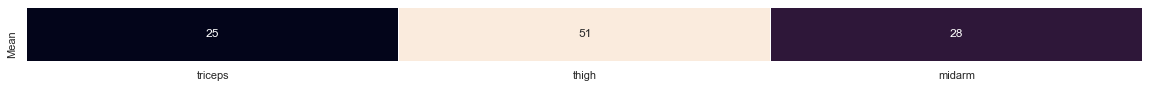

In [20]:
plt.figure(figsize = (20,1))
sns.heatmap(X_train.mean().to_frame().T.rename(index={0:'Mean'}),annot=True, linewidths=.5,cbar=False,xticklabels=True)

### Normalization of the data 

The linear negression is trying to balance the variable ranges

In [24]:
def scaling_preprocessing(X, y, scaler=None):
    print('Original shape:{}'.format(X.shape))    
    if scaler is None: 
        scaler = MinMaxScaler() # move to [0,1] scale
        X[:] = scaler.fit_transform(X[:])
    else: 
        X[:] = scaler.transform(X[:])
    return X, y, scaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, y_train, scaler = scaling_preprocessing(X_train,y_train)
X_test, y_test, _ = scaling_preprocessing(X_test,y_test,scaler)

Original shape:(13, 3)
Original shape:(7, 3)


<AxesSubplot:>

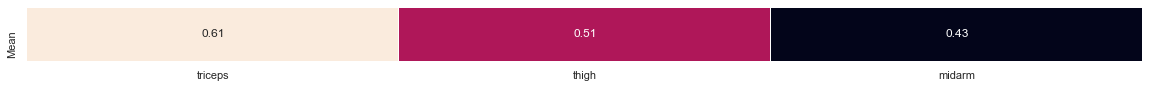

In [25]:
plt.figure(figsize = (20,1))
sns.heatmap(X_train.mean().to_frame().T.rename(index={0:'Mean'}),annot=True, linewidths=.5,cbar=False,xticklabels=True)

In [26]:
lr_scaled = LinearRegression(normalize=False)
lr_scaled.fit(X_train,y_train)
r2_lr_scaled = np.mean(cross_val_score(lr_scaled, X_train,y_train, cv=3, scoring='r2'))

ridge_cv_scaled =RidgeCV(alphas=lambdas,cv=5,normalize=False)
ridge_cv_scaled.fit(X_train,y_train)
r2_ridge_scaled = np.mean(cross_val_score(ridge_cv_scaled, X_train,y_train, cv=5, scoring='r2'))


lasso_cv_scaled =LassoCV(alphas=lambdas,cv=5,normalize=False)
lasso_cv_scaled.fit(X_train,y_train)
r2_lasso_scaled = np.mean(cross_val_score(ridge_cv_scaled, X_train,y_train, cv=5, scoring='r2'))

weights = pd.DataFrame({'lr scaled':lr_scaled.coef_, 'ridge_cv scaled':ridge_cv_scaled.coef_, 'lasso_cv scaled':lasso_cv_scaled.coef_},index=X_train.columns)
weights.T

,triceps,thigh,midarm
lr scaled,70.594,-45.791,-32.650
ridge_cv scaled,1.341,1.384,0.364
lasso_cv scaled,5.139,8.549,-0.000


In [27]:
r2_results = pd.DataFrame({'lr':r2_lr_scaled, 'ridge_cv':r2_ridge_scaled, 'lasso_cv':r2_lasso_scaled,},index=['CV R2'])

r2_results.loc['Train R2', :] =[r2_score(y_train,lr_scaled.predict(X_train)),
                                r2_score(y_train,ridge_cv_scaled.predict(X_train)),
                                r2_score(y_train,lasso_cv_scaled.predict(X_train))]
r2_results.loc['lambda','lr']=0
r2_results.loc['lambda','ridge_cv']=ridge_cv_scaled.alpha_
r2_results.loc['lambda','lasso_cv']=lasso_cv_scaled.alpha_
r2_results

,lr,ridge_cv,lasso_cv
CV R2,-0.225,-6.228,-6.228
Train R2,0.773,0.278,0.756
lambda,0.000,10.000,0.010


In [30]:
ridge_cv = RidgeCV(alphas=lambdas, cv=3, normalize=False)
ridge_cv.fit(X_train, y_train)
y_tes_predicted = ridge_cv.predict(X_test)
r2_ridge = ridge_cv.score(X_test,y_test)

print('Mean sqared error with test data: {}'.format(mean_squared_error(y_test,y_tes_predicted)))
print('R2 score with test data: {}'.format(r2_ridge))

Mean sqared error with test data: 10.170245984584994
R2 score with test data: 0.5104887300649632


## Advanced Exercise: Try to improve the results of the lab session

There are some points that could be improved from the lab session. 
- [ ] Linear regression is strongly affected by outliers. Design a strategy for removing outliers. Does it improve the validation metrics with respect to the best ones of the lab. 
- [ ] We have ignored (almost) completely our missing values. Design a strategy for handling missing values. Does it improve the validation metrics with respect to the best ones of the lab.   
- [ ] Some variables are not looking gaussian. Transforming them could improve your model performance. Does this improve validation metrics and/or generalization of the best model?

In [22]:
life_expentancy_data = pd.read_csv('Life_Expectancy_Data.csv')
# We remove spaces and symbols to avoid problems with statsmodel GLM
life_expentancy_data.columns = [c.lower().strip().replace(' ','_').replace('/','_').replace('-','_') for c in life_expentancy_data.columns] 

# We change the type of categorical variables into category
categorical_columns = list(life_expentancy_data.dtypes[life_expentancy_data.dtypes == 'O'].index.values)
for column in categorical_columns:
    life_expentancy_data[column] = life_expentancy_data[column].astype('category')

life_expentancy_data.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.280,65.0,1154,...,6.0,8.16,65.0,0.1,584.259,3.374e+07,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.524,62.0,492,...,58.0,8.18,62.0,0.1,612.697,3.276e+05,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219,64.0,430,...,62.0,8.13,64.0,0.1,631.745,3.173e+07,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184,67.0,2787,...,67.0,8.52,67.0,0.1,669.959,3.697e+06,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097,68.0,3013,...,68.0,7.87,68.0,0.1,63.537,2.979e+06,18.2,18.2,0.454,9.5
